# 1. Kaggle Moneyball 데이터셋 다운로드

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d wduckett/moneyball-mlb-stats-19622012 --unzip

Dataset URL: https://www.kaggle.com/datasets/wduckett/moneyball-mlb-stats-19622012
License(s): CC0-1.0
  0% 0.00/19.2k [00:00<?, ?B/s]
100% 19.2k/19.2k [00:00<00:00, 32.5MB/s]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('./baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


# 2. 데이터셋 정보

In [ ]:
print("데이터 개수:",len(df))
print("속성 종류:", df.columns.values)

데이터 개수: 1232
속성 종류: ['Team' 'League' 'Year' 'RS' 'RA' 'W' 'OBP' 'SLG' 'BA' 'Playoffs'
 'RankSeason' 'RankPlayoffs' 'G' 'OOBP' 'OSLG']


데이터셋의 전체적인 구조

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [ ]:
df['Year'] = df['Year'].astype(object)
df['Playoffs'] = df['Playoffs'].astype(object)

수치형 변수들의 기초 통계 정보

In [ ]:
df.describe()

,RS,RA,W,OBP,SLG,BA,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,3.122951,2.717213,161.918831,0.332264,0.419743
std,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,1.738349,1.095234,0.624365,0.015295,0.026510
min,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,4.000000,4.000000,162.000000,0.343000,0.438000
max,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,8.000000,5.000000,165.000000,0.384000,0.499000


수치형 변수들의 값 분포 시각화

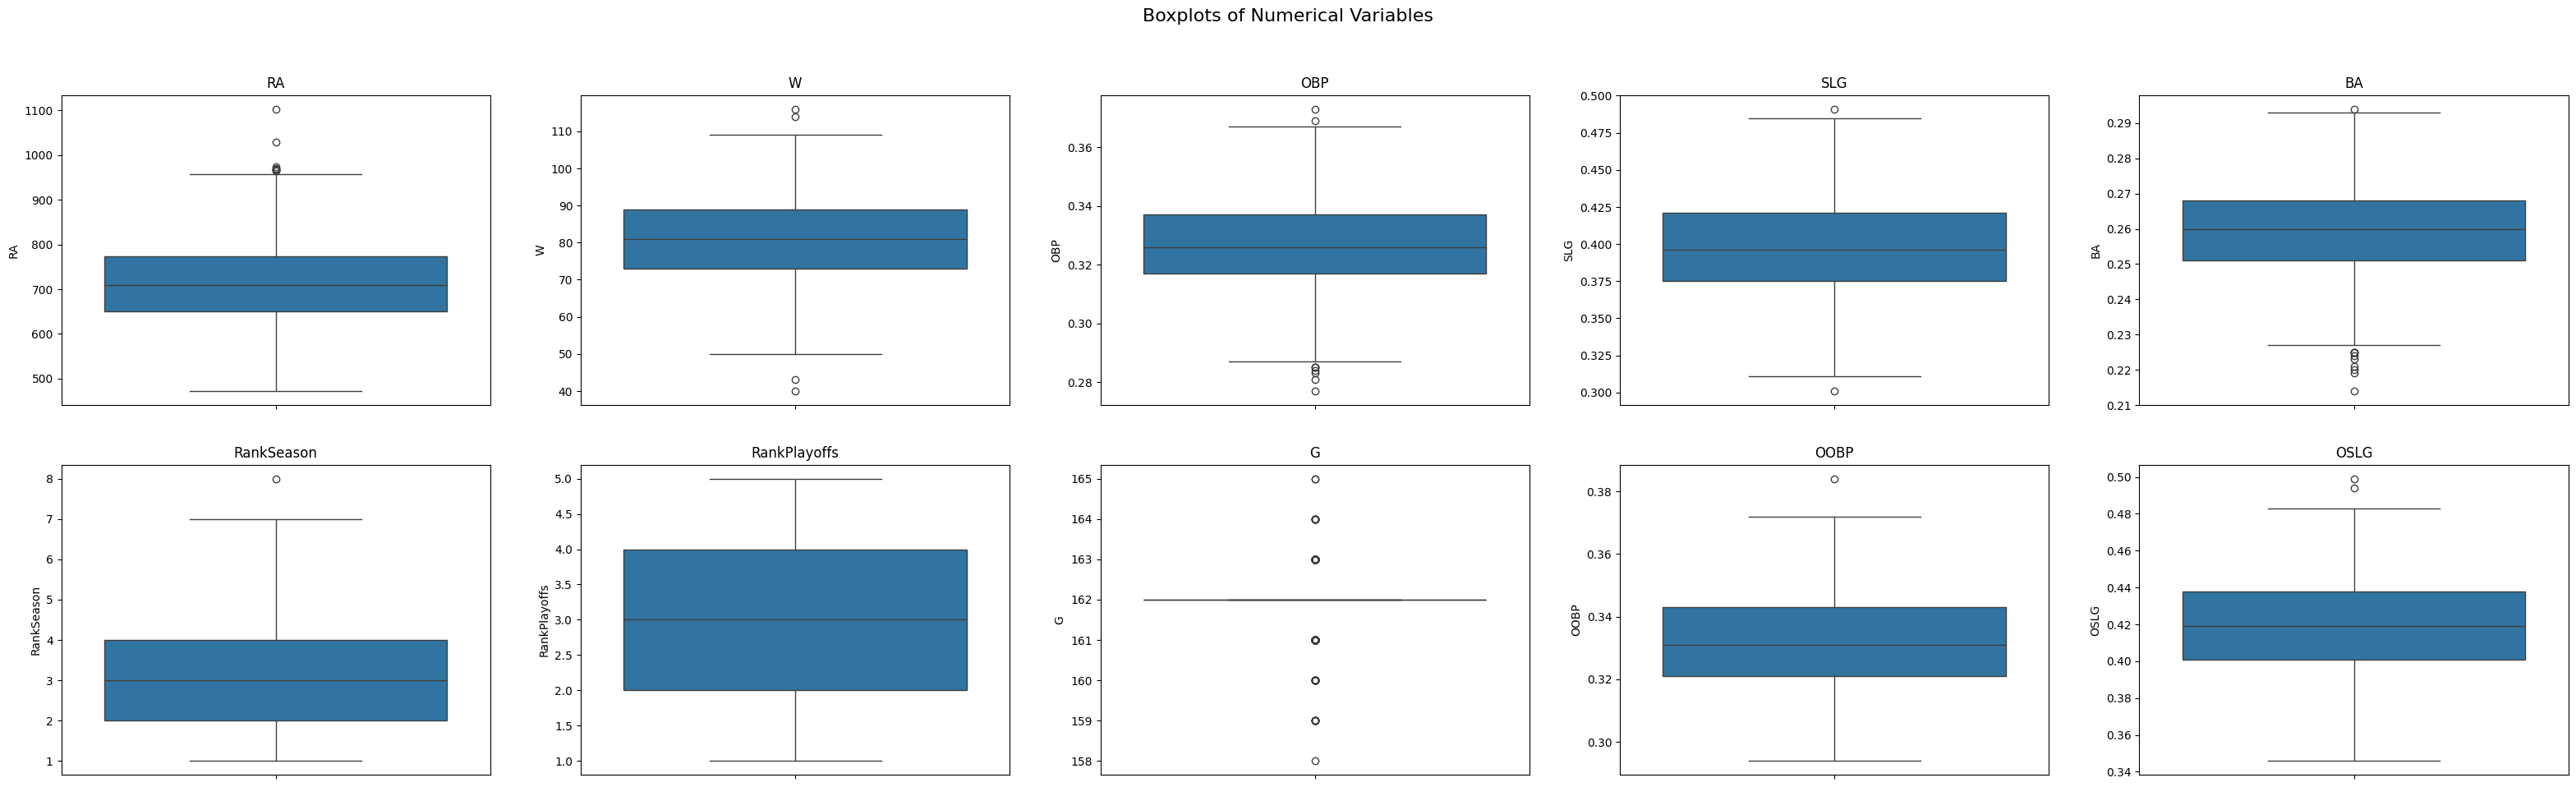

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(32, 10))  
fig.suptitle('Boxplots of Numerical Variables', fontsize=16)
axes = axes.flatten()

numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

for idx, col in enumerate(numerical_columns[1:]):
    sns.boxplot(y=df[col], ax=axes[idx])
    axes[idx].set_title(col)

plt.tight_layout(pad=3.0)
plt.show()

범주형 변수들의 기초 통계 정보

In [ ]:
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()

for col in categorical_columns:
    print(df[col].value_counts())
    print()

Team
HOU    47
DET    47
NYY    47
NYM    47
MIN    47
LAD    47
SFG    47
PIT    47
PHI    47
STL    47
CLE    47
CIN    47
CHW    47
CHC    47
BOS    47
BAL    47
ATL    43
OAK    41
KCR    40
SDP    40
MIL    39
TEX    37
TOR    33
SEA    33
MON    32
CAL    28
COL    18
FLA    17
ARI    15
LAA    11
TBD    10
WSA    10
WSN     8
ANA     8
KCA     6
TBR     5
MLN     4
MIA     1
SEP     1
Name: count, dtype: int64

League
NL    616
AL    616
Name: count, dtype: int64

Year
2012    30
2004    30
2011    30
1998    30
1999    30
2001    30
2002    30
2003    30
2000    30
2005    30
2006    30
2007    30
2008    30
2009    30
2010    30
1997    28
1996    28
1993    28
1984    26
1977    26
1978    26
1979    26
1980    26
1982    26
1983    26
1987    26
1985    26
1986    26
1988    26
1989    26
1990    26
1991    26
1992    26
1969    24
1970    24
1971    24
1973    24
1974    24
1975    24
1976    24
1968    20
1967    20
1966    20
1965    20
1964    20
1963    20
1962    20
Na

범주형 변수들의 값 분포 시각화

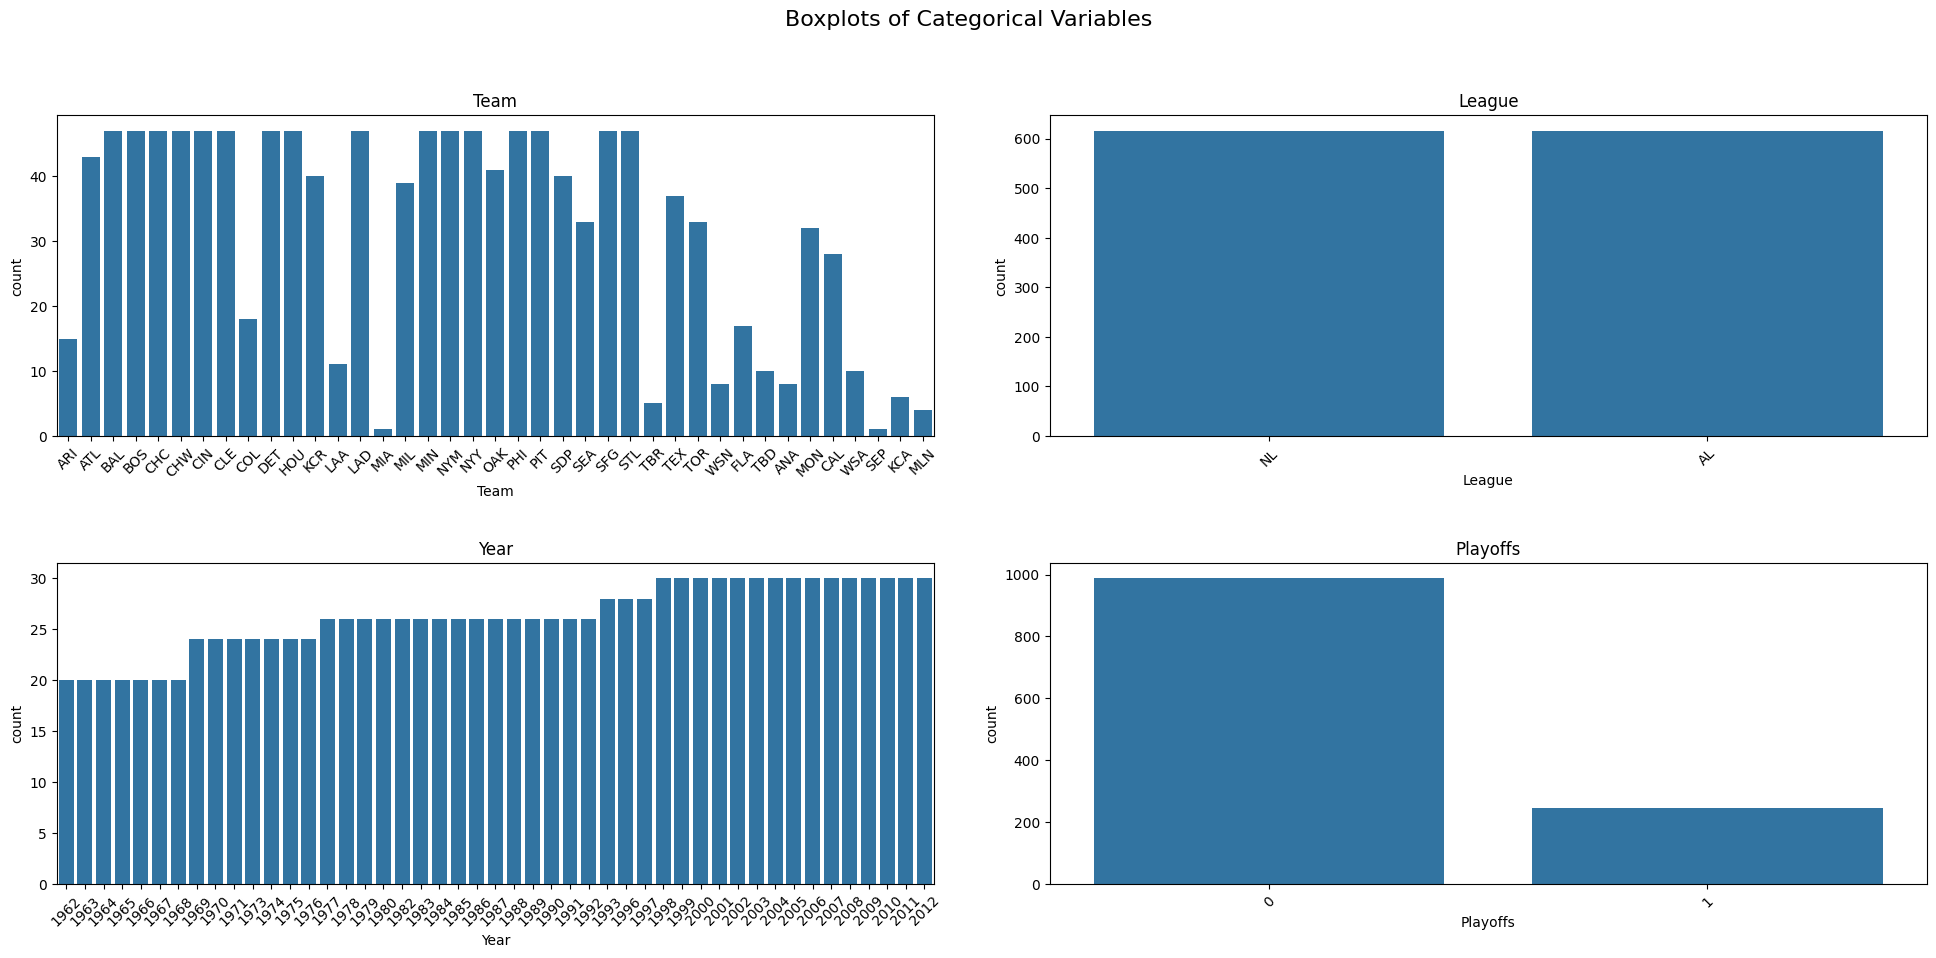

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))  
fig.suptitle('Boxplots of Categorical Variables', fontsize=16)

axes = axes.flatten()

for idx, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout(pad=3.0)
plt.show()

각 변수들에 대한 정보는 아래와 같습니다.

|변수명|설명|
|------|---|
|Team|팀의 이름을 나타내는 코드|
|League| 팀이 속한 메이저리그 야구 리그 (AL: 아메리칸 리그, NL: 내셔널 리그)|
|Year|데이터가 기록된 연도|
|RS(Runs Scored)|해당 연도 팀이 기록한 득점 수|
|RA(Runs Allowed)|해당 연도 팀이 허용한 실점 수|
|Wins(W)|해당 연도 팀의 정규 시즌 승리 수|
|OBP(On-Base Percentage)|해당 연도 팀의 출루율 (안타, 볼넷 등으로 베이스에 나간 비율)|
|SLG(Slugging Percentage)|해당 연도 팀의 장타율 (타자가 얼마나 멀리 진루했는지 나타내는 지표로 타격력을 측정)|
|BA(Batting Average)|해당 연도 팀의 타율 (타수가 안타가 된 비율)|
|Playoffs(binary)|해당 연도 팀의 플레이오프 진출 여부 (진출 시 1, 미진출 시 0)|
|RankSeason|플레이오프에 진출한 팀들 중 정규 시즌 성적 순위 (1이 가장 우수한 성적)|
|RankPlayoffs|플레이오프에 진출한 팀들 중 플레이오프 성적 순위 (월드시리즈 우승팀이 1위)|
|G(Games Played)|해당 연도 팀이 치른 경기 수|
|OOBP(Opponent On-Base Percentage)|상대팀의 출루율 (상대팀 타자가 베이스에 나간 비율)|
|OOSP(Opponent Slugging Percentage)|상대팀의 장타율 (상대팀 타자의 타격력을 나타내는 지표)|


# 3. 변수들 간의 관계 조사

### (1) 득점(RS)과 실점(RA)이 승리(Win)에 미치는 영향

In [ ]:
 import warnings
 warnings.filterwarnings("ignore")

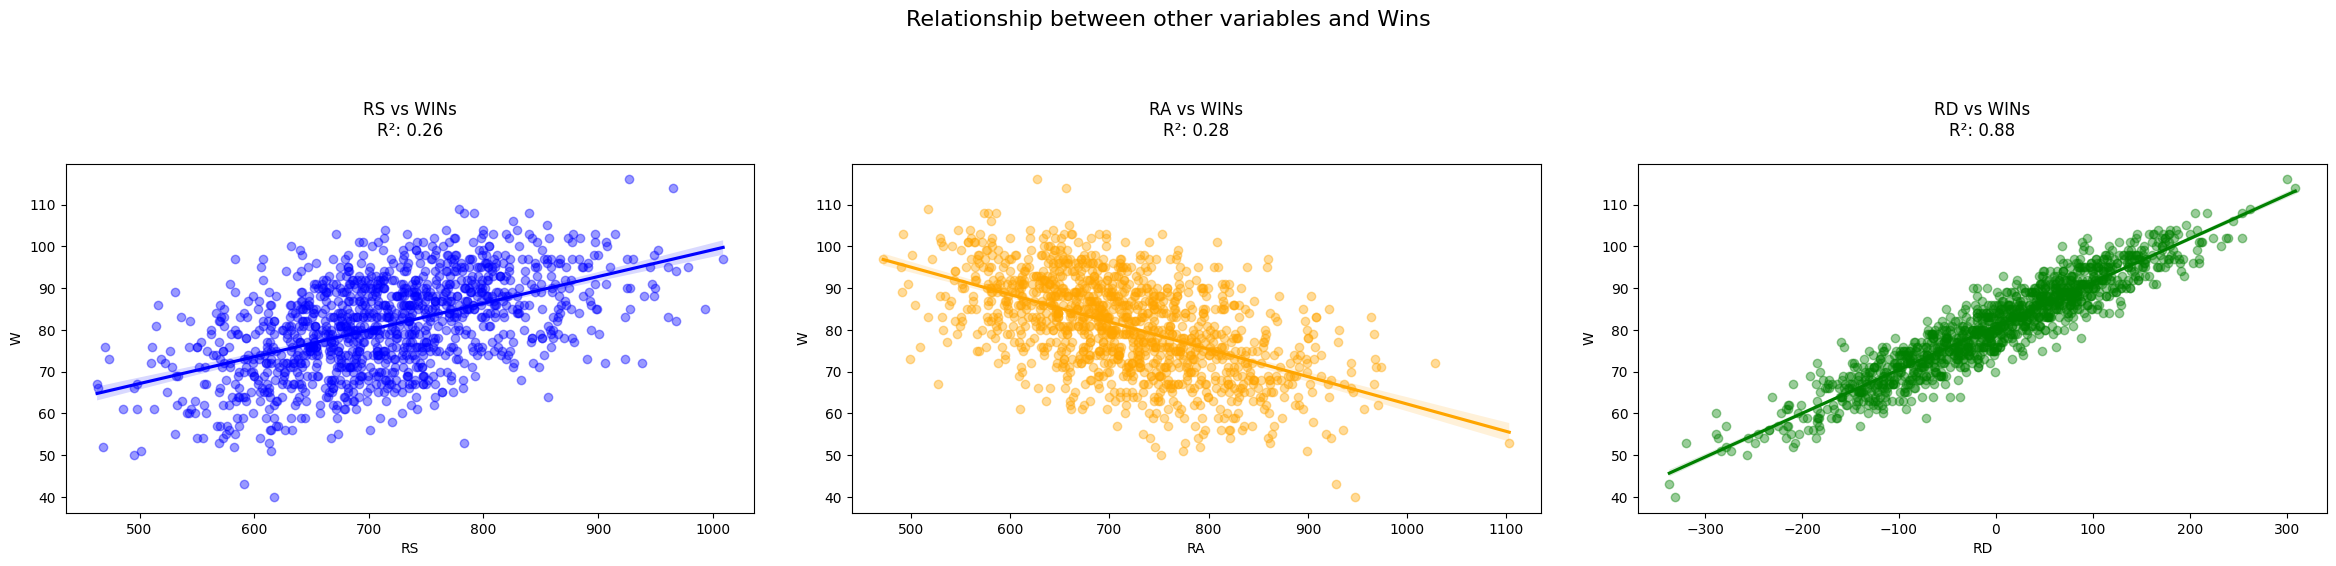

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))  # 1행 7열의 서브플롯
fig.suptitle('Relationship between other variables and Wins', fontsize=16)

df_temp = df.copy()
df_temp['RD'] = df_temp['RS'] - df_temp['RA']  # 득실차 계산

temp_columns = ['RS', 'RA', 'RD']
colors = ['blue', 'orange', 'green']

for idx, col in enumerate(temp_columns):
    sns.regplot(x=f'{col}', y='W', data=df_temp, scatter_kws={'alpha':0.4}, color=colors[idx], ax=axes[idx])
    axes[idx].set_title('{} vs WINs\nR²: {:.2f}'.format(col, df_temp[[f'{col}','W']].corr().iloc[0,1]**2), pad=20)

plt.tight_layout(pad=3.0)
plt.show()

당연하게도 승점(RS)이 높을수록 승리할 확률이 높고, 실점(RA)이 높을수록 패배할 확률이 높아지는 경향성을 확인할 수 있습니다.  
다만, 회귀선에서 크게 벗어난 일부 데이터들을 통해서 이러한 경향성에도 예외가 존재함을 알 수 있습니다.  

이와 달리, 득실차(RD)의 경우 대부분의 데이터가 회귀선 근처에 위치해 있음을 확인할 수 있습니다.  
득실차(RD)는 득점과 실점의 차이이기 때문에, 극단적인 값들이 상쇄되어 보다 안정적인 분포를 보이는 결과라고 할 수 있습니다.

### (2) 상대팀 출루율(OOBP)와 상대팀 장타율(OSLG)이 실점(RA)에 미치는 영향

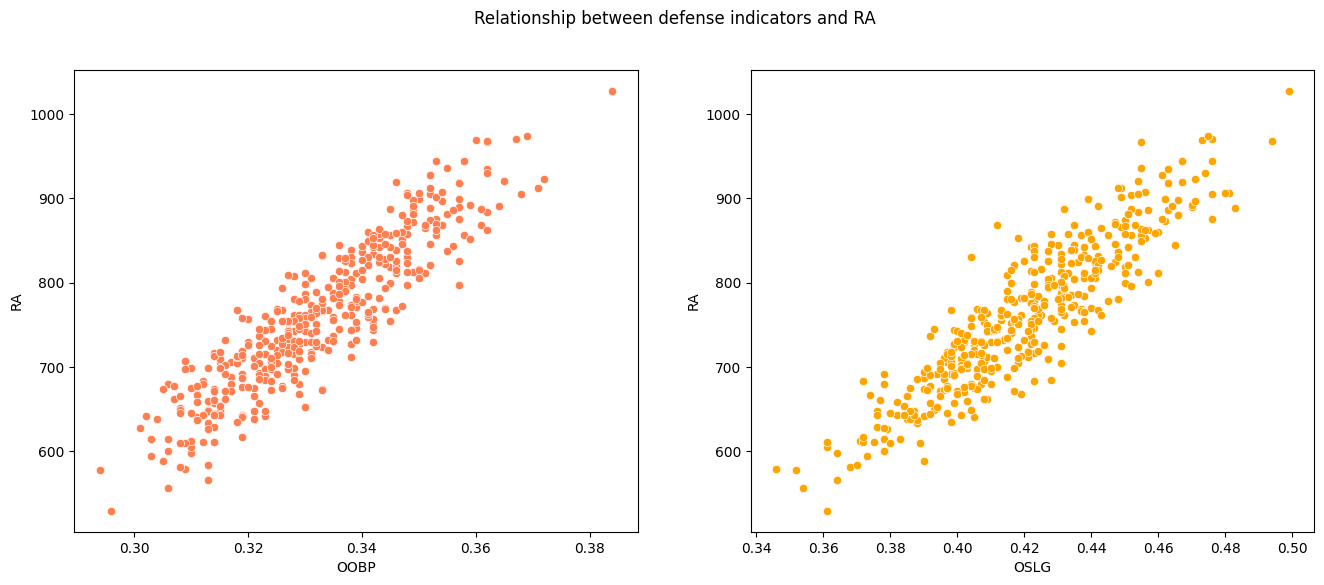

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
sns.scatterplot(ax=axes[0], x='OOBP', y='RA', data=df, color='coral')
sns.scatterplot(ax=axes[1], x='OSLG', y='RA', data=df, color='orange')
plt.suptitle('Relationship between defense indicators and RA')
plt.show()

상대팀의 출루율(OOBP)와 장타율(OSLG) 모두 실점(RA)과 양의 상관관계를 가짐을 확인할 수 있습니다.

### (3) 출루율(OBP), 장타율(SLG), 타율(BA)이 득점(RS)에 미치는 영향

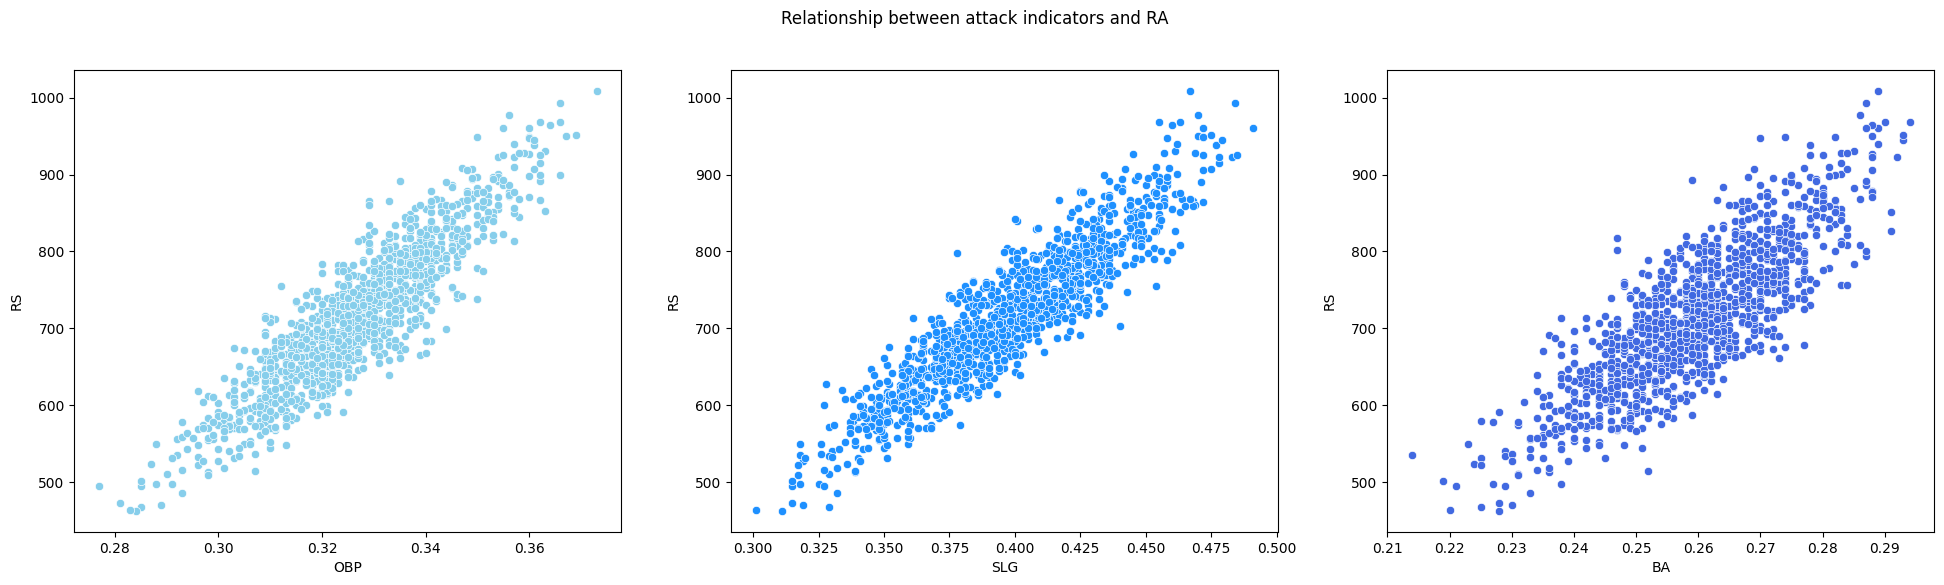

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(24,6))
sns.scatterplot(ax=axes[0], x='OBP', y='RS', data=df, color='skyblue')
sns.scatterplot(ax=axes[1], x='SLG', y='RS', data=df, color='dodgerblue')
sns.scatterplot(ax=axes[2], x='BA', y='RS', data=df, color='royalblue')

plt.suptitle('Relationship between attack indicators and RA')
plt.show()

출루율(OBP), 장타율(SLG), 타율(BA) 모두 득점(RS)과 양의 상관관계를 가짐을 확인할 수 있습니다.  

### (4) 플레이오프 진출 팀 vs 비진출 팀 공격지표(OBP, SLG, BA) 비교

In [ ]:
playoff_df = df[df['Playoffs'] == 1]
non_playoff_df = df[df['Playoffs'] == 0]

진출 팀의 공격지표 값 분포 비교

In [ ]:
playoff_df[['OBP', 'SLG', 'BA']].describe()

,OBP,SLG,BA
count,244.000000,244.000000,244.000000
mean,0.337320,0.419070,0.266807
std,0.013822,0.028949,0.011137
min,0.298000,0.335000,0.235000
25%,0.328000,0.399000,0.259750
50%,0.338000,0.420000,0.267000
75%,0.346000,0.437250,0.274000
max,0.373000,0.491000,0.293000


비진출 팀의 공격지표 값 분포 비교

In [ ]:
non_playoff_df[['OBP', 'SLG', 'BA']].describe()

,OBP,SLG,BA
count,988.000000,988.000000,988.000000
mean,0.323617,0.391976,0.257412
std,0.014030,0.032069,0.012639
min,0.277000,0.301000,0.214000
25%,0.314000,0.370000,0.249000
50%,0.323000,0.390500,0.258000
75%,0.333000,0.414250,0.266000
max,0.367000,0.484000,0.294000


두 그룹의 공격지표 값 분포 시각화

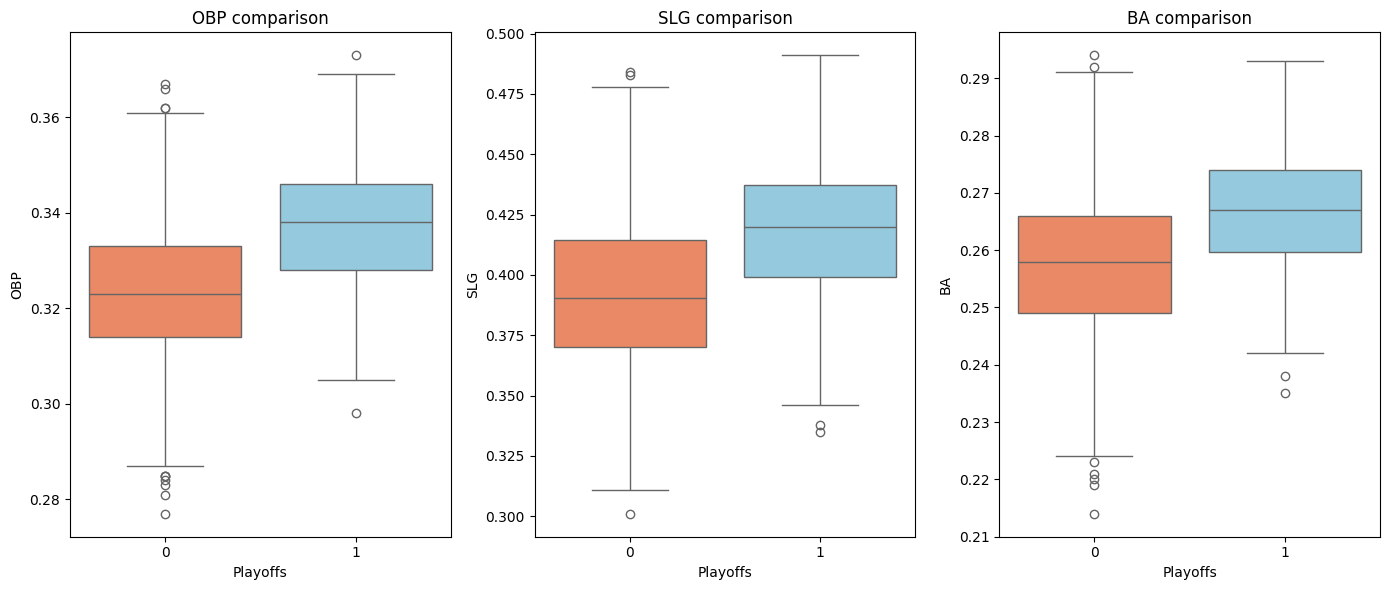

In [ ]:
plt.figure(figsize=(14,6))
metrics = ['OBP', 'SLG', 'BA']
for i, metric in enumerate(metrics, 1):
    plt.subplot(1,3,i)
    sns.boxplot(x='Playoffs', y=metric, data=df, palette=["coral", "skyblue"])
    plt.title(f'{metric} comparison')

plt.tight_layout()
plt.show()

1. 출루율(OBP) 비교
- 플레이오프 진출팀의 중앙값(0.338)이 비진출팀(0.323)보다 약 4.6% 높습니다.
- 비진출팀에서 boxplot 하단에 더 많은 이상치가 분포되어 있는 것을 확인할 수 있습니다.
2. 장타율(LSG) 비교
- 진출팀의 중앙값(0.42)이 비진출팀(0.39)보다 약 7.7% 높습니다.
3. 타율(BA) 비교
- 진출팀의 중앙값(0.267)이 비진출팀(0.258)보다 약 3.5% 높으며, 중앙값은 세 지표 중 가장 작은 차이를 보입니다.
- 진출팀에서의 편차가 상대적으로 더 작은 것을 볼 수 있습니다.

### (5) 연도별 득점 추이

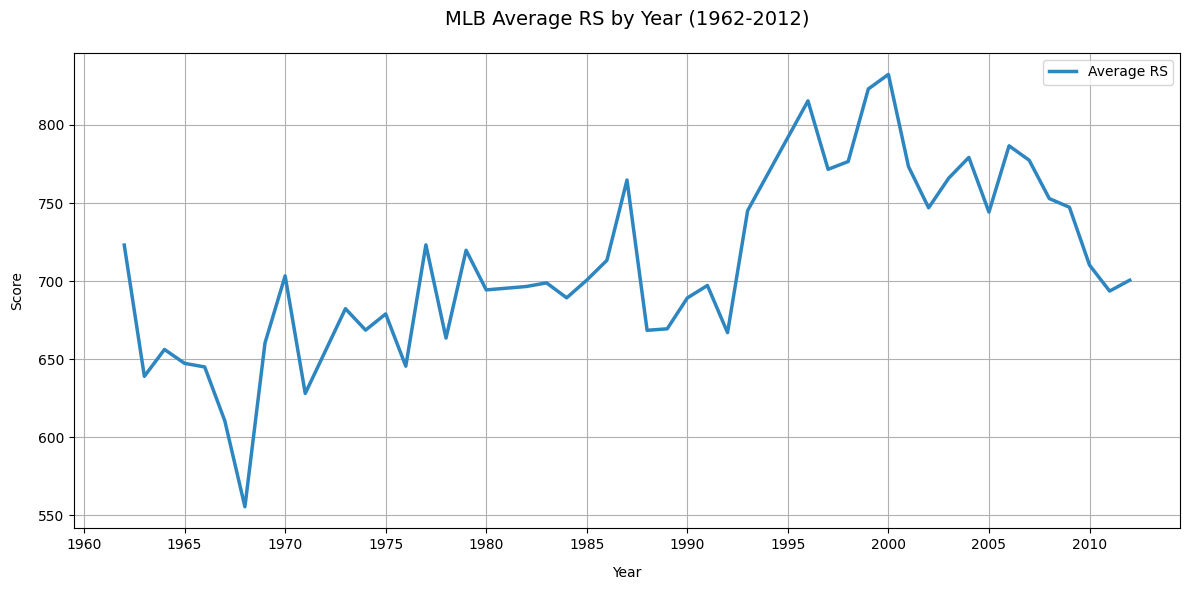

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

yearly_stats = df.groupby('Year').agg({'RS':'mean'}).reset_index()

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(yearly_stats['Year'], yearly_stats['RS'], color='#2E86C1', linewidth=2.5, label='Average RS')

plt.title('MLB Average RS by Year (1962-2012)', fontsize=14, pad=20)
plt.xlabel('Year', labelpad=10)
plt.ylabel('Score', labelpad=10)
plt.xticks(range(1960, 2013, 5))
plt.legend()
plt.tight_layout()
plt.show()

조사한 내용을 바탕으로 위의 그래프를 이해해보겠습니다.
1. 1964년 ~ 1968년: 평균 득점 하락  
   이 기간동안 평균 득점이 급격히 낮아진 것을 확인할 수 있습니다.  
   이는 1963년부터 스트라이크 존이 확대되어 타자들이 불리하게 작용한 결과로, 이로 인해 전체적인 득점이 하락된 것으로 보입니다.  
   특히, 1968년은 "투수의 해"라고 불릴 정도로 투수에게 유리한 환경이 조성된 해였습니다.
2. 1969년 스트라이크 존 축소 및 마운드 높이 조정  
   이후, 타자에게 유리한 환경이 마련되었고, 이에 따라 평균 득점이 상승하게 됩니다.
3. 지명타자 제도 도입  
   1973년에는 아메리칸 리그에서 타자가 투수 대신 타자가 타석에 들어갈 수 있는 제도가 도입되며 평균 득점이 상승하였습니다.
4. 1990년대 중반 ~ 2000년대 초: 스테로이드 시대  
   일부 선수들이 약물을 사용해 신체 능력을 향상시킨 결과 홈런과 득점이 폭발적으로 증가했습니다.  
   또한, 득점을 높이기 위해 야구공 성능이 업그레이드 되었다는 주장도 제기되었습니다.


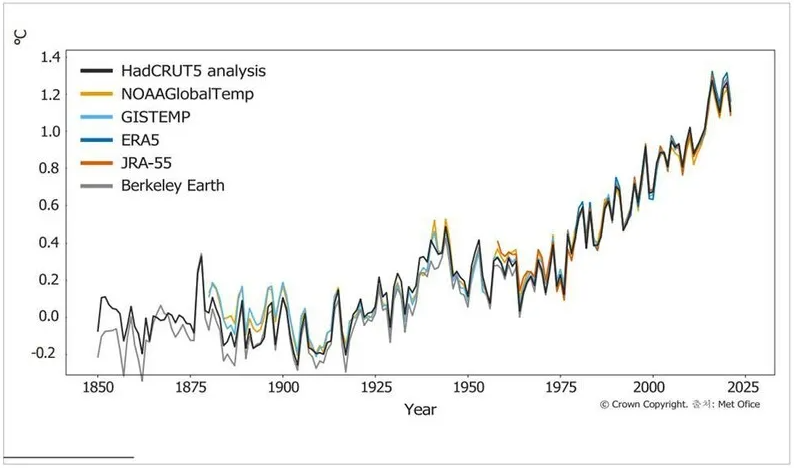

위의 그래프는 1990년대부터 기온이 급격히 상승하는 추이를 보여주는 기온 상승 그래프입니다.  
미국 다트머스 대학 맨킨 교수팀은 1962년부터 2019년까지의 10만 건 이상의 MLB 경기 날씨 데이터와 2015년부터 2019년까지의 타구 데이터를 분석한 결과, 경기 온도가 섭씨 1도 상승할 때마다 경기당 홈런이 약 2%씩 증가한다는 사실을 밝혀냈습니다.  
 논문 저자인 저스틴 맨킨은 온도가 높아질수록 공기 밀도가 낮아져, 야구공이 공중에서 받는 저항이 줄어들고 그 결과 공이 더 빠르고 멀리 날아갈 수 있다고 설명합니다.  
 이처럼 득점 증가에는 온도 변화 외에도 다양한 요인이 복합적으로 작용한 것으로 보입니다.

### (6) 2012 MLB 팀별 승리 횟수

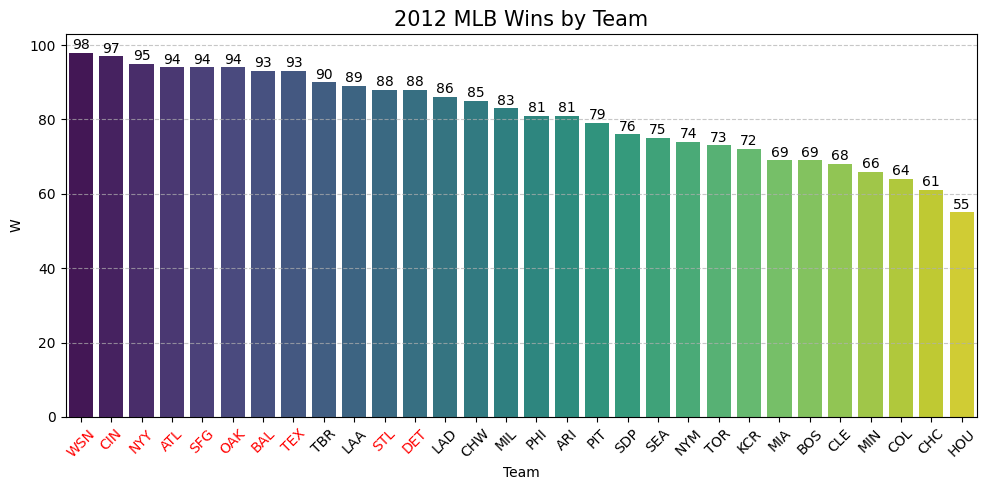

In [ ]:
df_2012 = df[df['Year'] == 2012]
df_2012_sorted = df_2012.sort_values('W', ascending=False)

plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x='Team', y='W', data=df_2012_sorted, palette='viridis')

for i, v in enumerate(df_2012_sorted['W']):
    bar_plot.text(i, v+1, str(v), ha='center')

for i, team in enumerate(df_2012_sorted['Team']):
    if df_2012_sorted.iloc[i]['Playoffs'] == 1:
        plt.gca().get_xticklabels()[i].set_color('red')

plt.title('2012 MLB Wins by Team', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

빨간색으로 표시된 팀은 플레이오프에 진출한 팀을 뜻합니다. 
승리한 횟수가 많은 팀이 플레이오프에 진출하는 경향을 확인할 수 있습니다.

### (7) 리그별 승리 횟수(W), 득점(RS), 실점(RA) 분포

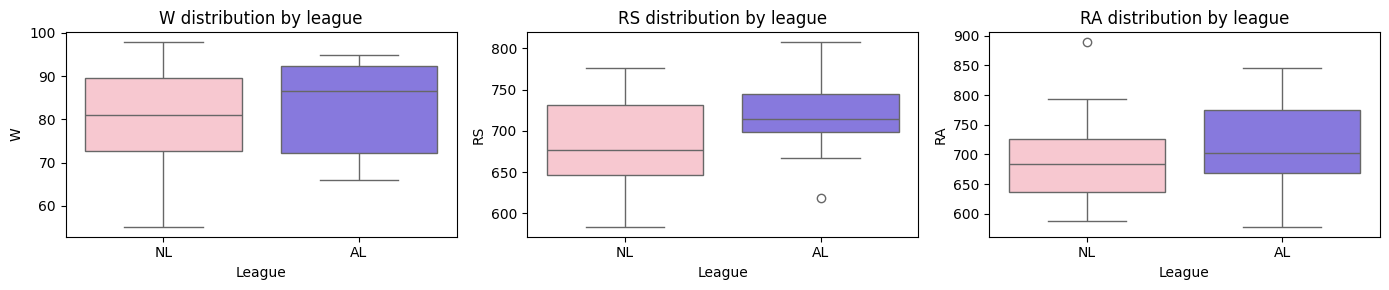

In [ ]:
plt.figure(figsize=(14,3))
metrics = ['W', 'RS', 'RA']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1,3,i)
    sns.boxplot(x='League', y=f'{metric}', data=df_2012, palette=["pink", "mediumslateblue"])
    plt.title(f'{metric} distribution by league')

plt.tight_layout()
plt.show()

1. 승리 횟수(W) 분포
- AL 팀들의 중앙값이 NL보다 높으며, NL은 비교적 더 큰 편차를 보입니다.
2. 득점(RS) 분포
- AL 팀들의 중앙값은 약 710점으로, NL(약 670점)보다 확연히 높았습니다.
- AL 팀들 중에 비정상적으로 낮은 득점을 기록한 팀이 있습니다.
3. 실점(RA) 분포
- AL 팀들의 중앙값이 NL보다 높으며, NL에서는 890점의 매우 높은 실점을 기록한 팀이 있습니다.

### (8) 주요 변수들 간의 상관관계 분석

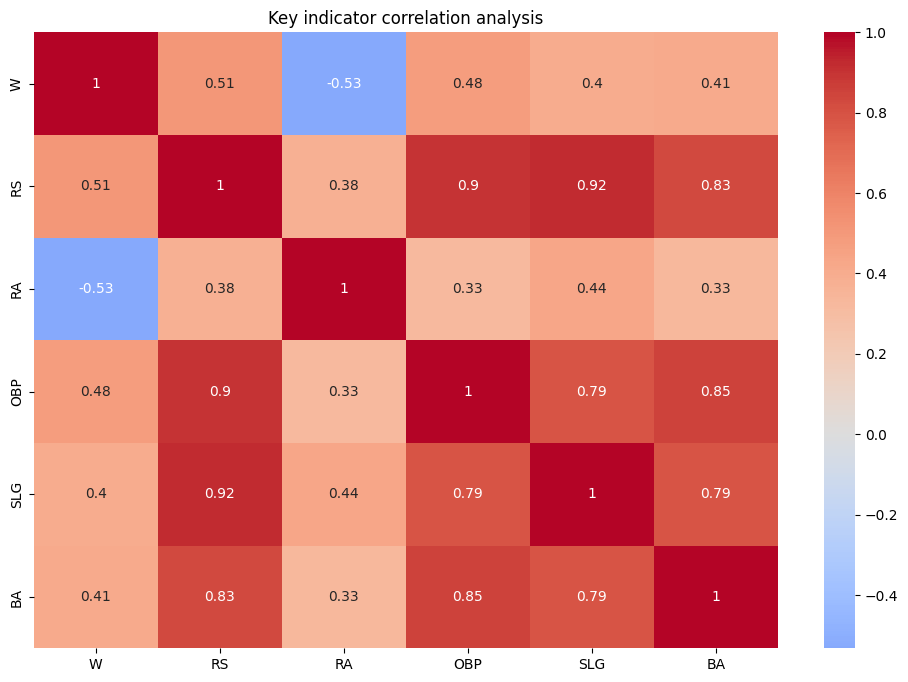

In [ ]:
corr_matrix = df[['W','RS','RA','OBP','SLG','BA']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Key indicator correlation analysis')
plt.show()

1. 팀 승률 패턴 분석에서 확인한 바와 같이, 득점(RS)과 실점(RA) 및 승리(W) 사이에는 뚜렷한 상관관계가 존재합니다.
2. 장타율(SLG)과 출루율(OBP)는 각각 0.92와 0.90의 매우 높은 상관관계를 보여, 득점(RS)과 밀접한 관련이 있음을 알 수 있습니다.
3. 타율(BA) 역시 득점(RS)과 0.83의 강한 상관관계를 나타냅니다.
4. 출루율(OBP)이 승리(W)에 미치는 영향(0.48)이 타율(BA)의 영향(0.41)보다 크게 나타납니다.  
  이러한 사실은 단순 안타율보다 출루 능력이 팀 승리에 더 중요하다는 '머니볼 이론'을 뒷받침합니다.
5. 실점(RA)과 공격 지표들(OBP, SLG, BA) 간에도 약한 양의 상관관계가 존재합니다 (0.33 ~ 0.44).  
   이는 공격적인 팀이 수비에도 취약할 수 있음을 시사합니다.